In [43]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import seaborn as sns
import os
import re
import time
import pickle
import pdb
#sns.set()

In [38]:
def reading_in_data(filename):
    
    #filename = str(filename)

    infile = open(str(filename),'rb')
    new_dict = pickle.load(infile)
    infile.close()
    
    return new_dict

In [41]:
List = [ reading_in_data("new_quasar_data_dict" + str(i)) for i in range(1,5) ]

In [3]:
quasar_dict1 = reading_in_data('new_quasar_data_dict1')
quasar_dict2 = reading_in_data('new_quasar_data_dict2')
quasar_dict3 = reading_in_data('new_quasar_data_dict3')
quasar_dict4 = reading_in_data('new_quasar_data_dict4')

star_dict1 = reading_in_data('new_star_data_dict1')
star_dict2 = reading_in_data('new_star_data_dict2')
star_dict3 = reading_in_data('new_star_data_dict3')
star_dict4 = reading_in_data('new_star_data_dict4')

In [30]:
noise_QSO = quasar_dict1['NOISE'] + quasar_dict2['NOISE'] + quasar_dict3['NOISE'] + quasar_dict4['NOISE']
wave_QSO = quasar_dict1['WAVE'] + quasar_dict2['WAVE'] + quasar_dict3['WAVE'] + quasar_dict4['WAVE']
flux_QSO = quasar_dict1['FLUX'] + quasar_dict2['FLUX'] + quasar_dict3['FLUX'] + quasar_dict4['FLUX']
classification_QSO = quasar_dict1['CLASS'] + quasar_dict2['CLASS'] + quasar_dict3['CLASS'] + quasar_dict4['CLASS']
plate_QSO = quasar_dict1['PLATE'] + quasar_dict2['PLATE'] + quasar_dict3['PLATE'] + quasar_dict4['PLATE']
mjd_QSO = quasar_dict1['MJD'] + quasar_dict2['MJD'] + quasar_dict3['MJD'] + quasar_dict4['MJD']
fiber_QSO = quasar_dict1['FIBER'] + quasar_dict2['FIBER'] + quasar_dict3['FIBER'] + quasar_dict4['FIBER']

In [5]:
noise_STAR = star_dict1['NOISE'] + star_dict2['NOISE'] + star_dict3['NOISE'] + star_dict4['NOISE']
wave_STAR = star_dict1['WAVE'] + star_dict2['WAVE'] + star_dict3['WAVE'] + star_dict4['WAVE']
flux_STAR = star_dict1['FLUX'] + star_dict2['FLUX'] + star_dict3['FLUX'] + star_dict4['FLUX']
classification_STAR = star_dict1['CLASS'] + star_dict2['CLASS'] + star_dict3['CLASS'] + star_dict4['CLASS']
plate_STAR = star_dict1['PLATE'] + star_dict2['PLATE'] + star_dict3['PLATE'] + star_dict4['PLATE']
mjd_STAR = star_dict1['MJD'] + star_dict2['MJD'] + star_dict3['MJD'] + star_dict4['MJD']
fiber_STAR = star_dict1['FIBER'] + star_dict2['FIBER'] + star_dict3['FIBER'] + star_dict4['FIBER']

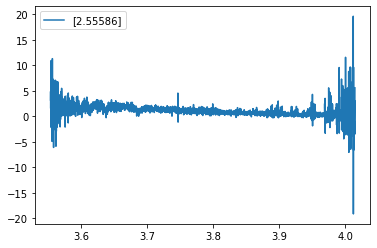

In [21]:
plt.plot(wave_STAR[0], flux_STAR[0], label = noise_STAR[0])
plt.legend()

In [18]:
print(len(noise_STAR))
print(len(noise_QSO))

71101
73086


In [7]:
# For these commented lines just add _QSO to the end for them to run

# print(plate_QSO[33390])
# print(mjd[33390])
# print(fiber[33390])

# print(type(plate))

In [8]:
# plate == 6151
# mjd == 56265

# trueplate = np.where(plate == 6151)[0]
# truemjd = np.where(mjd == 56265)[0]
# print(trueplate)
# print(plate == 6151)
# print(mjd == 56265)

In [9]:
# plate = np.asarray(plate)
# mjd = np.asarray(mjd)

# plate == 6151
# mjd == 56265

# trueplate = np.where(plate == 6151)[0]
# truemjd = np.where(mjd == 56265)[0]
# print(trueplate)
# print(truemjd)
# print(plate == 6151)
# print(mjd == 56265)

In [10]:
# plate = np.asarray(plate)
# mjd = np.asarray(mjd)
# fiber = np.asarray(fiber)

# print(len(plate))

# plate_id1 = (plate == 6151) & (mjd == 56265) & (fiber == 88)
# plate_id2 = (plate == 7848) & (mjd == 56959) & (fiber == 965)
# plate_id3 = (plate == 4415) & (mjd == 55831) & (fiber == 580)
# plate_id4 = (plate == 4354) & (mjd == 55810) & (fiber == 356)
# plate_id5 = (plate == 7147) & (mjd == 56574) & (fiber == 889)
# plate_id6 = (plate == 6593) & (mjd == 56720) & (fiber == 170)


    
# true_plate1 = np.where(plate_id1)[0]
# true_plate2 = np.where(plate_id2)[0]
# true_plate3 = np.where(plate_id3)[0]
# true_plate4 = np.where(plate_id4)[0]
# true_plate5 = np.where(plate_id5)[0]
# true_plate6 = np.where(plate_id6)[0]



# print(true_plate1)
# print(true_plate2)
# print(true_plate3)
# print(true_plate4)
# print(true_plate5)
# print(true_plate6) # only in new txt file not old, but missing

In [11]:
#print(noise[33391])

In [12]:
# plt.plot(wave[0], flux[0], label = str(classification[0]))
# plt.xlabel('Wavelength')
# plt.ylabel('Flux')

In [13]:
QSO_highSN = []
QSO_lowSN = []
STAR_highSN = []
STAR_lowSN = []

for i in range(len(noise_QSO)):
    
    if noise_QSO[i] >= 10.:
        QSO_highSN.append(noise_QSO[i])
        
    else:
        QSO_lowSN.append(noise_QSO[i])
        
for i in range(len(noise_STAR)):
    
    if noise_STAR[i] >= 10.:
        STAR_highSN.append(noise_STAR[i])
        
    else:
        STAR_lowSN.append(noise_STAR[i])

In [14]:
print(len(QSO_highSN))
print(len(QSO_lowSN))
print(len(STAR_highSN))
print(len(STAR_lowSN))

6328
66758
23671
47430


Create high SN cut-off at >10. Train on that and test on two different sets of low SN 1) 5-10 & 2) <= 5

Train the CNN on just high SN and test on Low

Train CNN on mixture of high/low SN and test on the same Low set 

(-1, 50)

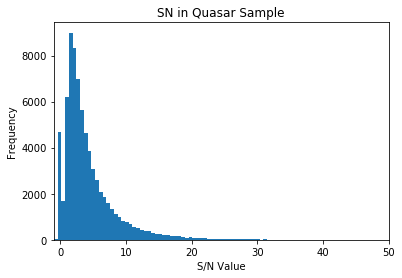

In [15]:
a,b,c = plt.hist(np.asarray(noise_QSO), bins = 200)
plt.title('SN in Quasar Sample')
plt.xlabel('S/N Value')
plt.ylabel('Frequency')
plt.xlim(-1,50)

(-1, 50)

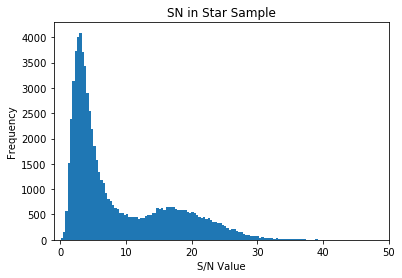

In [17]:
a,b,c = plt.hist(np.asarray(noise_STAR), bins = 200)
plt.title('SN in Star Sample')
plt.xlabel('S/N Value')
plt.ylabel('Frequency')
plt.xlim(-1,50)

In [ ]:
#plt.hist(noise[:10000], bins = 1000)

In [ ]:
#plt.hist(quasar_dict1['NOISE'], bins = 1000)

6151/spec-6151-56265-0088.fits
7848/spec-7848-56959-0965.fits
4415/spec-4415-55831-0580.fits
4354/spec-4354-55810-0356.fits
7147/spec-7147-56574-0889.fits

In [ ]:
quasar_dict = reading_in_data("/Users/matt/Desktop/DESI_Research/DESI_ML/old/old_data/quasar_data")

star_dict = reading_in_data("/Users/matt/Desktop/DESI_Research/DESI_ML/old/old_data/star_data")

In [ ]:
quasar_noise = quasar_dict['NOISE']
star_noise = star_dict['NOISE']

In [ ]:
quasar_SN = np.asarray(quasar_noise)
star_SN = np.asarray(star_noise)

In [ ]:
print(len(quasar_SN))

In [ ]:
highSN = []
lowSN = []

for i in range(len(quasar_SN)):
    
    if quasar_SN[i] >= 12.:
        highSN.append(quasar_SN[i])
        
    else:
        lowSN.append(quasar_SN[i])

In [ ]:
print(len(highSN))
print(len(lowSN))

In [ ]:
a,b,c = plt.hist(quasar_SN, bins = 50)

In [ ]:
a,b,c = plt.hist(star_SN, bins = 50)

In [ ]:
max(star_SN)